In [2]:
import itertools

import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [3]:
df_train = pd.read_csv("../data/heartbeat/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("../data/heartbeat/mitbih_test.csv", header=None)
df_test = df_test.sample(frac=1)


In [14]:
Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y = df_train[187]
X = df_train.iloc[:, :187]
# X
# Y


0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


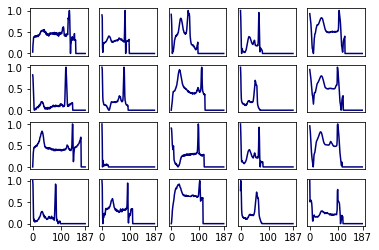

In [40]:
fig, axes = plt.subplots(nrows=4, ncols=5)

for i, ax in enumerate(fig.axes):
    print(i%5)
    X[Y==i%5].iloc[i,:].plot(ax=ax, color='navy')
    ax.set_xticks([])
    ax.set_yticks([])
for i in [0, 5, 10, 15]:
    fig.axes[i].set_yticks([0, 0.5, 1])
for i in [15, 16, 17, 18, 19]:
    fig.axes[i].set_xticks([0, 100, 187])    
plt.savefig('mibih_samples.svg')
plt.show()

In [45]:
pca = PCA().fit(X)
evr = np.cumsum(pca.explained_variance_ratio_)
cut = evr[evr>=0.99][0]
cut_index = np.where(evr == cut)

In [87]:
n_components = cut_index[0].item()#.item()
ipca = IncrementalPCA(n_components=n_components, batch_size=100)
X_ipca = ipca.fit_transform(X)


54


ValueError: RGBA sequence should have length 3 or 4

<Figure size 432x288 with 4 Axes>

In [95]:
km = KMeans(n_clusters=5)
y_pred_km = km.fit_predict(X=X_ipca)

In [96]:
gmm = GaussianMixture(n_components=5, covariance_type='full',
                              max_iter=100).fit(X_ipca)
y_pred_gm = gmm.predict(X_ipca)

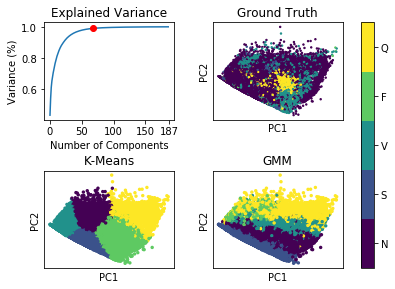

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(h_pad=3.0)

###%% Explained Variance
axes[0,0].plot(evr)
axes[0,0].plot(cut_index, cut, 'ro')
axes[0,0].set_xticks([0, 50, 100, 150, 187])
axes[0,0].set_xlabel('Number of Components')
axes[0,0].set_ylabel('Variance (%)') #for each component
axes[0,0].set_title("Explained Variance")

###%% Ground Truth
# colors = ['navy', 'turquoise', 'darkorange', 'green', 'red']
colors = ['#440154', '#3B528B', '#21918B', '#5EC962', '#FDE725']

c1 = axes[0,1].scatter(X_ipca[:, 0], X_ipca[:, 1], c=Y, s=2, cmap=mpl.colors.ListedColormap(colors))
axes[0,1].set_xlabel("PC1")
axes[0,1].set_ylabel("PC2")
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[0,1].set_title("Ground Truth")
cb = fig.colorbar(c1, ax=axes)
cb.set_ticks([0.4, 1.2, 2.0, 2.8, 3.6])
cb.set_ticklabels(['N', 'S', 'V', 'F', 'Q'])


##%% KMeans Classifier
axes[1,0].scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred_km, s=2, cmap=mpl.colors.ListedColormap(colors))
axes[1,0].set_xlabel("PC1")
axes[1,0].set_ylabel("PC2")
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
axes[1,0].set_title("K-Means")

# plt.show()

##%% Gaussian Mixture Model
axes[1,1].scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred_gm, s=2, cmap=mpl.colors.ListedColormap(colors))
axes[1,1].set_xlabel("PC1")
axes[1,1].set_ylabel("PC2")
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
axes[1,1].set_title("GMM")

plt.savefig('mitbih_clustering.png', dpi=600)
plt.show()